In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from math import sqrt
import scipy.stats as stats
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

In [ ]:
Train=pd.read_csv("/content/titanic_train.csv")#Loading The Data Set   
Test= pd.read_csv('/content/titanic_test.csv')

**Data Exploration**

In [ ]:
Train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  420 non-null    int64  
 1   Pclass       420 non-null    int64  
 2   Name         420 non-null    object 
 3   Sex          420 non-null    object 
 4   Age          334 non-null    float64
 5   SibSp        420 non-null    int64  
 6   Parch        420 non-null    int64  
 7   Ticket       420 non-null    object 
 8   Fare         419 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     420 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.2+ KB


In [ ]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1.**38 Percent** Survived In the Train Data Set
2.passenger ages range from 0.4 to 80.


In [ ]:
#Train['PassengerId'] = Train['PassengerId'].astype('category')
#Train['Survived'] = Train['Survived'].astype('category')
#Test['PassengerId'] = Test['PassengerId'].astype('category')
Test.info()
Train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  420 non-null    int64  
 1   Pclass       420 non-null    int64  
 2   Name         420 non-null    object 
 3   Sex          420 non-null    object 
 4   Age          334 non-null    float64
 5   SibSp        420 non-null    int64  
 6   Parch        420 non-null    int64  
 7   Ticket       420 non-null    object 
 8   Fare         419 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     420 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

In [ ]:
Train.drop_duplicates(inplace = True)
Test.drop_duplicates(inplace= True)

In [ ]:
# Checking For Null Values

In [ ]:
total = Train.isnull().sum().sort_values(ascending=False)
total

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

As we can see from the results that Cabin and age has many null values which are hard to  deal as it will delete around **80 percent **of our data. While it is easier to manage embarked as it contain just **2 null values**

In [ ]:
#Dealing with Embarked
common_value = 'S'
data = [Train, Test]

for x in data:
    x['Embarked'] = x['Embarked'].fillna(common_value)
  

In [ ]:
#Dealing with Cabin
for x in data :
  x['Cabin']=x['Cabin'].fillna(0)
  

In [ ]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
#Dealing With Age
Mean=Train['Age'].mean()
for x in data :
  x['Age']=x['Age'].fillna(Mean)
  Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

In [ ]:
#Dealing with fare
Test[Test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,0,S


In [ ]:
Test.Fare.mean()

35.492522195704026

In [ ]:
Test.groupby(["Sex", "Pclass"]).mean()["Fare"].unstack()
#Find the median fare for pclass = 3 and embarked = S and fill the NAs with this value
median_fare = Test.loc[(Test.Pclass == 3) & (Test.Embarked == 'S'),'Fare'].median()
print(median_fare)
Test.Fare.fillna(median_fare,inplace=True)
Test.info()

8.05
<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  420 non-null    int64  
 1   Pclass       420 non-null    int64  
 2   Name         420 non-null    object 
 3   Sex          420 non-null    object 
 4   Age          420 non-null    float64
 5   SibSp        420 non-null    int64  
 6   Parch        420 non-null    int64  
 7   Ticket       420 non-null    object 
 8   Fare         420 non-null    float64
 9   Cabin        420 non-null    object 
 10  Embarked     420 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.4+ KB


In [ ]:
Train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S


In [ ]:
Class=Train.groupby(['Pclass','Survived']).count().iloc[:,0:1].unstack()
Class2 = Class.iloc[:,0:2].sum(axis=1)


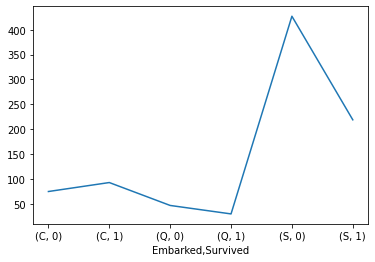

In [ ]:
Embark=Train.groupby(['Embarked','Survived']).count()
Embark["Name"].plot(kind='line')#People who boarded from S has the least chance of survival

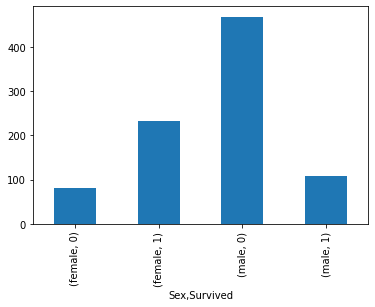

In [ ]:
Class1=Train.groupby(['Sex','Survived']).count().dropna()
Class1["Name"].plot(kind='bar') 

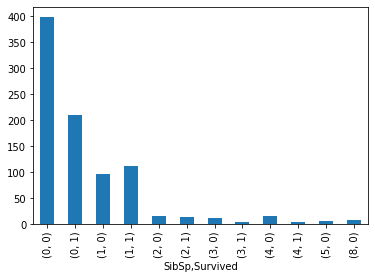

In [ ]:
ClassS=Train.groupby(['SibSp','Survived']).count().dropna()
ClassS["Name"].plot(kind='bar')

As you can from the graphs above that the chances of

In [ ]:
Train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,0,Q


In [ ]:
print(Train.Age.skew())
print(Train.Fare.skew())

0.4344880940129925
4.787316519674893


In [ ]:
Train.Survived.mean()

0.3838383838383838

In [ ]:
Train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Working with outliers
Many times the data is incorrect / impossible. It can be found out using outlier analysis

In [ ]:
Train.skew()#Fare is Skewed


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [ ]:
Train.kurtosis()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.966279
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

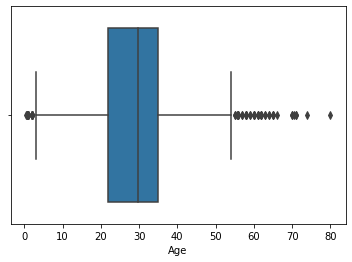

In [ ]:
import seaborn as sns
sns.boxplot(Train.Age)

In [ ]:
#Feature Enginnering
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
Train["Title"] = Train.Name.str.split("[,.]").str.get(1).str.lower().str.strip()
Test["Title"] = Test.Name.str.split("[,.]").str.get(1).str.lower().str.strip()



In [ ]:
Train.groupby("Title").count().PassengerId

Title
capt              1
col               2
don               1
dr                7
jonkheer          1
lady              1
major             2
master           40
miss            182
mlle              2
mme               1
mr              517
mrs             125
ms                1
rev               6
sir               1
the countess      1
Name: PassengerId, dtype: int64

In [ ]:
Train.groupby('Title').count().PassengerId
for x in data:
  x["Title"]=x["Title"].replace(['capt','col','don','dr','jonkheer','lady','major','master','miss','mlle','mme','mr','mrs','ms','rev','sir','the countess']
                                ,['Officer',"Officer","Sir",'Officer',"Sir",'Lady',"Officer",'Master','Miss','Miss',"Mrs",'Mr','Mrs','Mrs',"Sir",'Sir','Lady'])
  


Age Column

In [ ]:
# AgeState based on Age


In [ ]:
# AgeState based on Age
Test["Age"] = pd.cut(Test.Age, bins = [0, 2, 5, 18,60,100], labels=["Infant", "Toddler", "Child", "Adult", 'Senior_Citizen'],include_lowest=True)


FamilySIze

In [ ]:
Train['FamilySize'] = Train.Parch + Train.SibSp + 1

In [ ]:
Test['FamilySize'] = Test.Parch + Test.SibSp + 1

In [ ]:
Train['Cabin']=Train['Cabin'].replace([0],'Z')
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,S,Mr,1


In [ ]:
Train['Deck']=Train.Cabin.str.get(0)
Train.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,S,Mr,2,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,C


In [ ]:
Train_1=Train.drop(['Pclass','Name','SibSp','Parch',"Ticket",'Cabin'],axis=1)

In [ ]:
Train_1

,PassengerId,Survived,Sex,Age,Fare,Embarked,Title,FamilySize,Deck
0,1,0,male,22.000000,7.2500,S,Mr,2,Z
1,2,1,female,38.000000,71.2833,C,Mrs,2,C
2,3,1,female,26.000000,7.9250,S,Miss,1,Z
3,4,1,female,35.000000,53.1000,S,Mrs,2,C
4,5,0,male,35.000000,8.0500,S,Mr,1,Z
...,...,...,...,...,...,...,...,...,...
886,887,0,male,27.000000,13.0000,S,Sir,1,Z
887,888,1,female,19.000000,30.0000,S,Miss,1,B
888,889,0,female,29.699118,23.4500,S,Miss,4,Z
889,890,1,male,26.000000,30.0000,C,Mr,1,C


In [ ]:
from scipy.stats import pearsonr

corr,pvalue = pearsonr(Train_1['Age'],Train_1['Fare'])
pvalue



0.006235676128297275

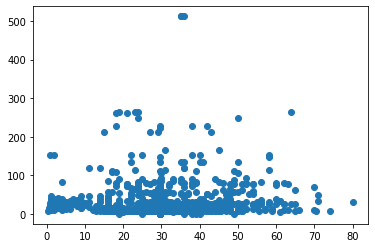

In [ ]:
#For Understanding --- Will be covered in detail next week 
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(Train_1["Age"], Train_1["Fare"])

In [ ]:
stats.ttest_ind(Train_1[Train_1['Sex']=='male'].Age,Train_1[Train_1['Sex']=='female'].Age)

Ttest_indResult(statistic=2.5180596509816655, pvalue=0.011974983006826145)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
mod = ols('Fare~Survived+PassengerId', data=Train_1) #y has to be continuous 
mod = mod.fit() #ols ordinary least squares - trying to fit a line on the scatterplot b/w y and x which is minimizing sse
aov = sm.stats.anova_lm(mod) #fitted ols model to be passed
print(aov)




                df        sum_sq        mean_sq          F        PR(>F)
Survived       1.0  1.455089e+05  145508.887663  62.972981  6.297612e-15
PassengerId    1.0  4.274912e+02     427.491168   0.185009  6.672082e-01
Residual     888.0  2.051862e+06    2310.655871        NaN           NaN
